# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
import cv2

Using TensorFlow backend.


In [2]:
np.random.seed(100)

In [3]:
%matplotlib inline
import cv2

# 資料準備

In [4]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar100.load_data()

In [5]:
print('x_img_train  :', x_img_train.shape)
print('y_label_train:', y_label_train.shape)
print('x_image_test :', x_img_test.shape)
print('y_label_test :', y_label_test.shape)

x_img_train  : (50000, 32, 32, 3)
y_label_train: (50000, 1)
x_image_test : (10000, 32, 32, 3)
y_label_test : (10000, 1)


In [18]:
cifar100

<module 'keras.datasets.cifar100' from 'C:\\Users\\User\\Anaconda3\\lib\\site-packages\\keras\\datasets\\cifar100.py'>

In [6]:
#?cifar100

In [24]:
# https://www.cs.toronto.edu/~kriz/cifar.html
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        d = pickle.load(fo, encoding='bytes')
    return d
cifar100db = unpickle(r'C:\Users\User\Documents\GitHub\2nd-ML100Days\homework\data\cifar-100-python\cifar-100-python\meta')

In [35]:
cifar100db[b'coarse_label_names']

{b'coarse_label_names': [b'aquatic_mammals',
  b'fish',
  b'flowers',
  b'food_containers',
  b'fruit_and_vegetables',
  b'household_electrical_devices',
  b'household_furniture',
  b'insects',
  b'large_carnivores',
  b'large_man-made_outdoor_things',
  b'large_natural_outdoor_scenes',
  b'large_omnivores_and_herbivores',
  b'medium_mammals',
  b'non-insect_invertebrates',
  b'people',
  b'reptiles',
  b'small_mammals',
  b'trees',
  b'vehicles_1',
  b'vehicles_2'],
 b'fine_label_names': [b'apple',
  b'aquarium_fish',
  b'baby',
  b'bear',
  b'beaver',
  b'bed',
  b'bee',
  b'beetle',
  b'bicycle',
  b'bottle',
  b'bowl',
  b'boy',
  b'bridge',
  b'bus',
  b'butterfly',
  b'camel',
  b'can',
  b'castle',
  b'caterpillar',
  b'cattle',
  b'chair',
  b'chimpanzee',
  b'clock',
  b'cloud',
  b'cockroach',
  b'couch',
  b'crab',
  b'crocodile',
  b'cup',
  b'dinosaur',
  b'dolphin',
  b'elephant',
  b'flatfish',
  b'forest',
  b'fox',
  b'girl',
  b'hamster',
  b'house',
  b'kangaroo',
  

In [37]:
label_dict = {}
for i,s in enumerate(cifar100db[b'fine_label_names']):
    label_dict[i] = s.decode('utf-8')

In [27]:
'''label_dict = {
    0:"beaver", 1:"dolphin",2:"otter", 3:"seal", 4:"whale",
    5:"aquarium-fish", 6:"flatfish", 7:"ray", 8:"shark", 9:"trout",
    10:"orchids", 11:"poppies", 12:"roses", 13:"sunflowers", 14:"tulips",
    15:"bottles", 16:"bowls", 17:"cans", 18:"cups", 19:"plates",
    20:"apples", 21:"mushrooms", 22:"oranges", 23:"pears", 24:"sweet_peppers",
    25:"clock", 26:"computer-keyboard", 27:"lamp", 28:"telephone", 29:"television",
    30:"bed", 31:"chair", 32:"couch", 33:"table", 34:"wardrobe",
    35:"bee", 36:"beetle", 37:"butterfly", 38:"caterpillar", 39:"cockroach",
    40:"bear", 41:"leopard", 42:"lion", 43:"tiger", 44:"wolf",
    45:"bridge", 46:"castle", 47:"house", 48:"road", 49:"skyscraper",
    50:"cloud", 51:"forest", 52:"mountain", 53:"plain", 54:"sea",
    55:"camel", 56:"cattle", 57:"chimpanzee", 58:"elephant", 59:"kangaroo",
    60:"fox", 61:"porcupine", 62:"possum", 63:"raccoon", 64:"skunk",
    65:"crab", 66:"lobster", 67:"snail", 68:"spider", 69:"worm",
    70:"baby", 71:"boy", 72:"girl", 73:"man", 74:"woman",
    75:"crocodile", 76:"dinosaur", 77:"lizard", 78:"snake", 79:"turtle",
    80:"hamster", 81:"mouse", 82:"rabbit", 83:"shrew", 84:"squirrel",
    85:"maple", 86:"oak", 87:"palm", 88:"pine", 89:"willow",
    90:"bicycle", 91:"bus", 92:"motorcycle", 93:"pickup-truck", 94:"train",
    95:"lawn-mower", 96:"rocket", 97:"streetcar", 98:"tank", 99:"tractor"
}'''

'label_dict = {\n    0:"beaver", 1:"dolphin",2:"otter", 3:"seal", 4:"whale",\n    5:"aquarium-fish", 6:"flatfish", 7:"ray", 8:"shark", 9:"trout",\n    10:"orchids", 11:"poppies", 12:"roses", 13:"sunflowers", 14:"tulips",\n    15:"bottles", 16:"bowls", 17:"cans", 18:"cups", 19:"plates",\n    20:"apples", 21:"mushrooms", 22:"oranges", 23:"pears", 24:"sweet_peppers",\n    25:"clock", 26:"computer-keyboard", 27:"lamp", 28:"telephone", 29:"television",\n    30:"bed", 31:"chair", 32:"couch", 33:"table", 34:"wardrobe",\n    35:"bee", 36:"beetle", 37:"butterfly", 38:"caterpillar", 39:"cockroach",\n    40:"bear", 41:"leopard", 42:"lion", 43:"tiger", 44:"wolf",\n    45:"bridge", 46:"castle", 47:"house", 48:"road", 49:"skyscraper",\n    50:"cloud", 51:"forest", 52:"mountain", 53:"plain", 54:"sea",\n    55:"camel", 56:"cattle", 57:"chimpanzee", 58:"elephant", 59:"kangaroo",\n    60:"fox", 61:"porcupine", 62:"possum", 63:"raccoon", 64:"skunk",\n    65:"crab", 66:"lobster", 67:"snail", 68:"spider", 

In [38]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=100):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

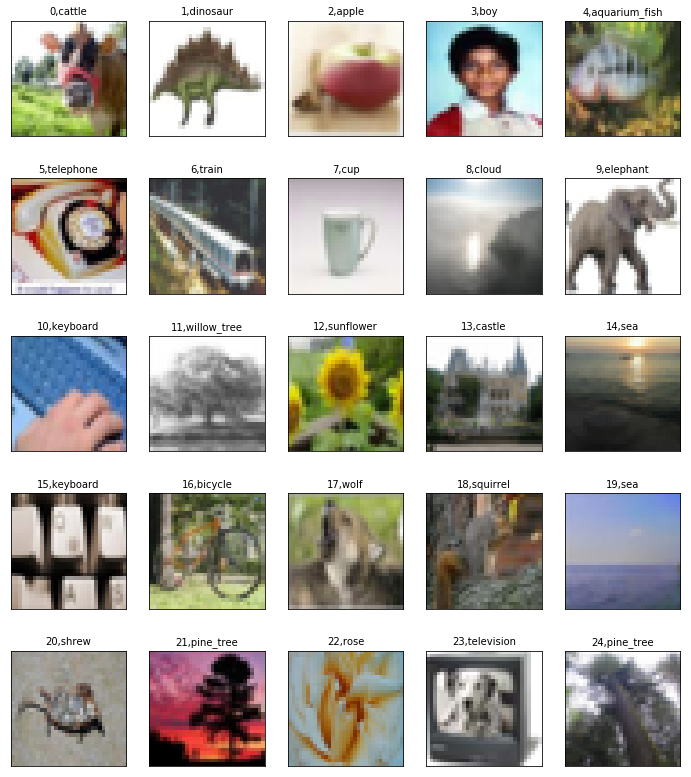

In [39]:
#針對不同的影像作標記

plot_images_labels_prediction(x_img_train,y_label_train,[],0)

# Image normalize 

In [41]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [42]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [43]:
x_img_train_normalize[0][0][0]

array([ 1.,  1.,  1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [44]:
y_label_train.shape

(50000, 1)

In [45]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [46]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [47]:
y_label_train_OneHot.shape

(50000, 100)

In [48]:
y_label_train_OneHot[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0